In [1]:
#!conda install -c conda-forge gsl galpy
import galpy
import numpy
print(galpy.__version__)

1.10.2


# Rotation curves

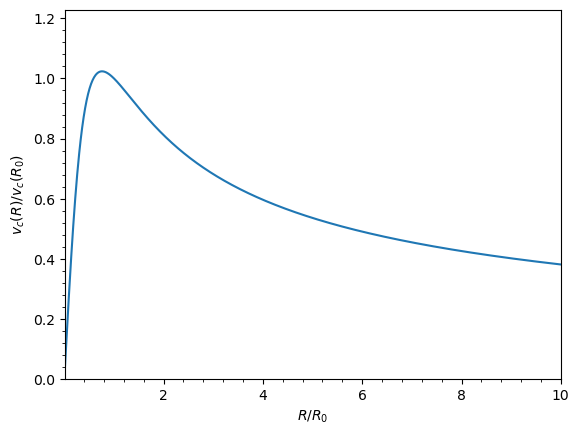

In [2]:
from galpy.potential import MiyamotoNagaiPotential
mp = MiyamotoNagaiPotential(a=0.5, b=0.0375, normalize=1.)
mp.plotRotcurve(Rrange=[0.01,10.], grid=1001)

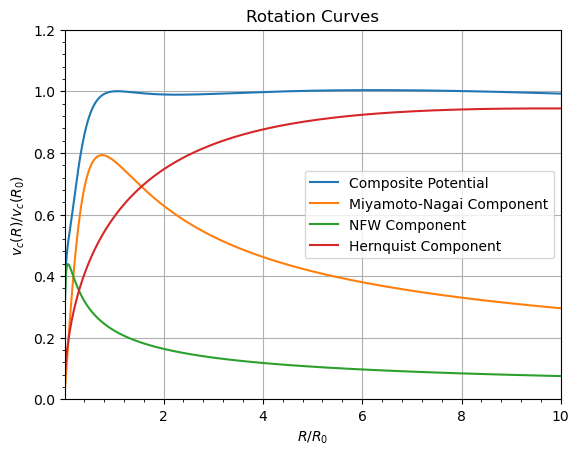

In [3]:
from galpy.potential import NFWPotential, HernquistPotential
mp = MiyamotoNagaiPotential(a=0.5, b=0.0375, normalize=.6) # normalize values sum to 1 --> circular velocity =1 at R=1
np = NFWPotential(a=4.5, normalize=.35)
hp = HernquistPotential(a=0.6/8, normalize=0.05)

from galpy.potential import plotRotcurve
plotRotcurve(hp+mp+np, Rrange=[0.01,10.], grid=1001, yrange=[0.,1.2])
# can replace hp+mp+np with [hp,mp,np] or with MWPotential2014 if you import it from galpy.potential

mp.plotRotcurve(Rrange=[0.01,10.], grid=1001, overplot=True) # overplot=True ensures all curves are on one figure
hp.plotRotcurve(Rrange=[0.01,10.], grid=1001, overplot=True)
np.plotRotcurve(Rrange=[0.01,10.], grid=1001, overplot=True)

import matplotlib.pyplot as plt
plt.title("Rotation Curves")
plt.grid()
plt.legend(['Composite Potential', 'Miyamoto-Nagai Component', 'NFW Component', 'Hernquist Component'])
#plt.savefig("Final Project Rotation Curves")

# Units in galpy

In [4]:
# galpy's natural/internal units are such that circular velocity =1 at R=1

from galpy.util import conversion
# In natural units, orbital time at R=1 is 2pi
print("circular orbital time for v=220 km/s and R=8 kpc is ", 2.*numpy.pi*conversion.time_in_Gyr(220.,8.), " Gyr")
# Should be 0.223405444283 (about 223 Myr)

from galpy.potential import MWPotential2014, evaluatezforces
print("vertical force 1.1 kpc above the galactic plane (v=220 km/s, R=8 kpc) is ",
      -evaluatezforces(MWPotential2014, 1., 1.1/8.)*conversion.force_in_pcMyr2(220.,8.), "pc/Myr^2")
# expect 2.0259181908629933

print("vertical force 1.1 kpc above the galactic plane (v=220 km/s, R=8 kpc) is ",
      -evaluatezforces(MWPotential2014, 1., 1.1/8.)*conversion.force_in_2piGmsolpc2(220.,8.), "2pi*G*M_solar/pc^2")
# force/acceleration in terms of G, M_solar, pc
# expect 71.658016957792356

print("local dark matter density at R=8 kpc (v=220 km/s) is ",
      MWPotential2014[2].dens(1., 0.)*conversion.dens_in_msolpc3(220., 8.), " M_sol/pc^3")
# expect 0.0075419566970079373

circular orbital time for v=220 km/s and R=8 kpc is  0.22340544439051707  Gyr
vertical force 1.1 kpc above the galactic plane (v=220 km/s, R=8 kpc) is  2.0259181889046634 pc/Myr^2
vertical force 1.1 kpc above the galactic plane (v=220 km/s, R=8 kpc) is  71.67605643105574 2pi*G*M_solar/pc^2
local dark matter density at R=8 kpc (v=220 km/s) is  0.0075438553390854805  M_sol/pc^3


# Physical units

In [5]:
from galpy.potential import MiyamotoNagaiPotential
from astropy import units
mp = MiyamotoNagaiPotential(amp=5*10**10*units.Msun, a=3.*units.kpc, b=300.*units.pc, ro=9*units.kpc, vo=230.*units.km/units.s)
# Miyamoto-Nagai disk potential: mass (5*10^10)M_Sun, scale length 3 kpc, scale height 300 pc, distance scale 9 kpc, velocity scale 230 km/s

mp.turn_physical_off() # output in internal units
print(mp.vcirc(10.*units.kpc))
# expect 0.61692726624127459

"""documentation: If you setup a Potential, Orbit, etc. object without specifying the parameters as a Quantity, the
default is to return output in natural units, except when ro= and vo= scales are specified (exception: when you wrap a
potential that has physical outputs on, the wrapped potential will also have them on)."""

print(mp.vcirc(10.*units.kpc, ro=12.*units.kpc))
# 0.69273212489609337

mp.turn_physical_on() # turn overall physical output on
print(mp.vcirc(10.*units.kpc), " km/s")
# 135.72399857308042
print(mp.vcirc(10.*units.kpc, use_physical=False))
# 0.61692726624127459 # in natural units

0.5900222955868322
0.6447078693255767
135.7051279849714  km/s
0.5900222955868322


# Orbit integration

Text(0, 0.5, 'z (kpc)')

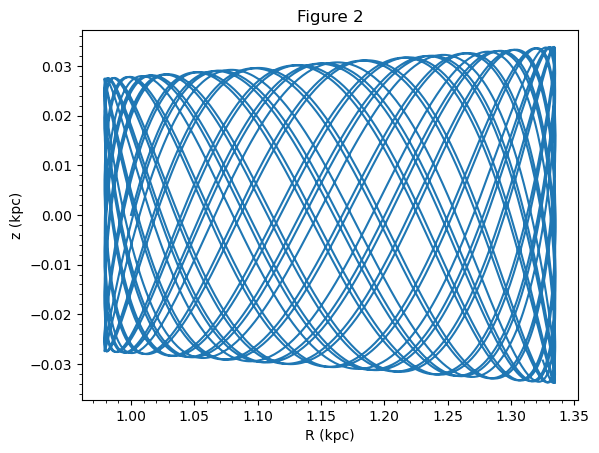

In [6]:
"""documentation: Warning: galpy uses a left-handed Galactocentric coordinate frame, as is common in studies of the
kinematics of the Milky Way. This means that in particular cross-products, like the angular momentum, behave differently
than in a right-handed coordinate frame."""

from galpy.orbit import Orbit
mp = MiyamotoNagaiPotential(a=0.5, b=0.0375, amp=1., normalize=1.) # scale length a = 0.5 kpc
o = Orbit([1., 0.1, 1.1, 0., 0.1]) # 5D initial condition [R,vR,vT,z,vz] (--> we're dealing w/ 3D axisymmetric potential in which we don't wanna track azimuth)
ts = numpy.linspace(0, 100, 10000)
o.integrate(ts, mp) # <class 'NoneType'>
o.plot()

plt.title("Figure 2")
plt.xlabel("R (kpc)") # overriding automatic x- and y-axis labels
plt.ylabel("z (kpc)")

Text(0.5, 1.0, 'Energy Over Time')

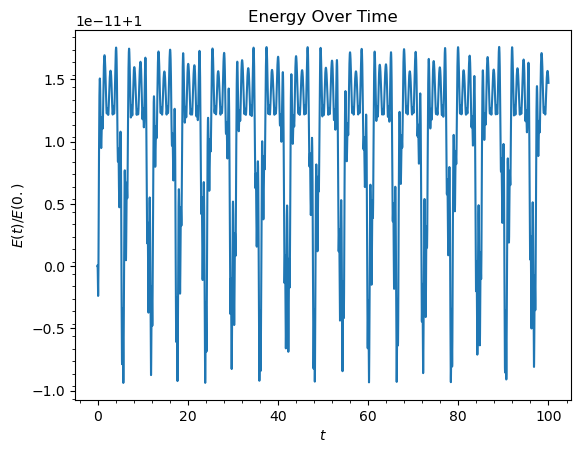

In [7]:
o.plotE(normed=True) # Can't find this method in the library reference of the documentation page
# looks different than the figure on the documentation (introduction page)
plt.title("Energy Over Time")

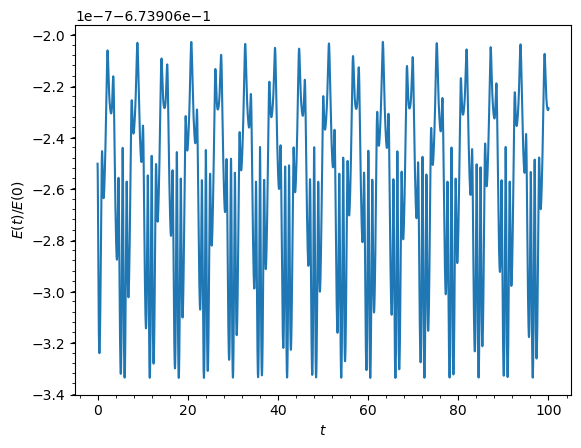

In [8]:
o.integrate(ts,mp,method='leapfrog')
o.plotE(xlabel=r'$t$',ylabel=r'$E(t)/E(0)$')
# shape looks like what's on the documentation (introduction) but upside down. and different y range

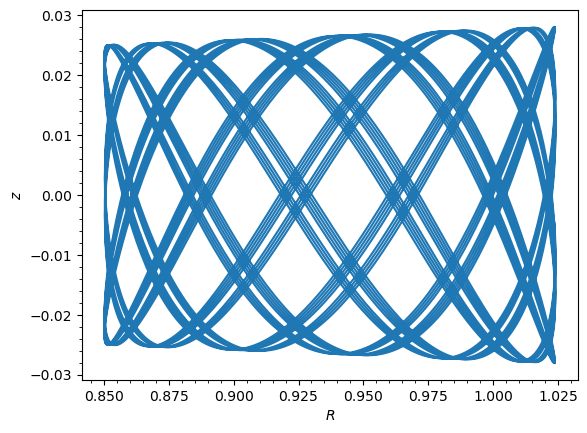

In [9]:
ts = numpy.linspace(0, 100, 10000)
o.integrate(ts, mp+hp+np)
o.plot() # doesn't look exactly like what's on the documentation (introduction)

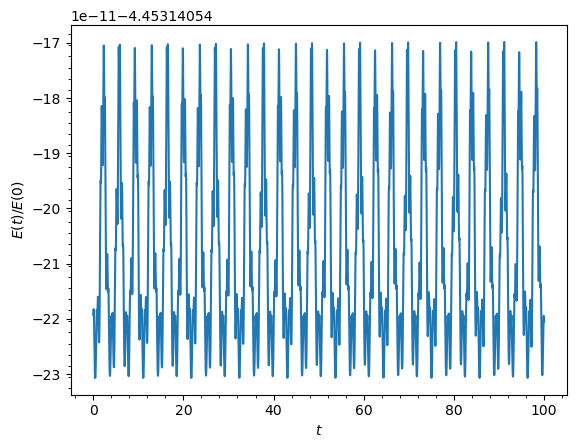

In [10]:
o.plotE(xlabel=r'$t$',ylabel=r'$E(t)/E(0)$') # still doesn't look like what's on the documentation (introduction)

# Escape velocity curves

(0.5, 2.5)

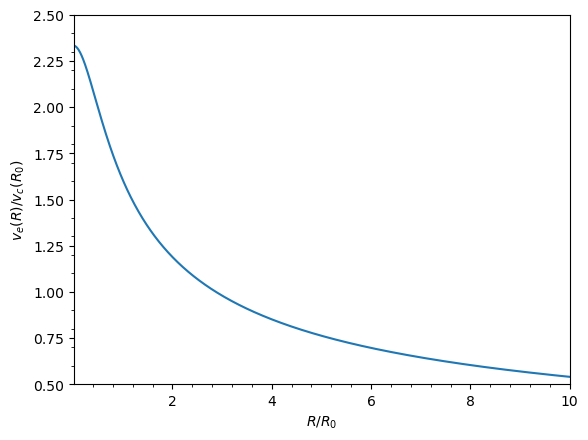

In [18]:
mp.plotEscapecurve(Rrange=[0.01,10.], grid=1001)

import matplotlib.pyplot as plt
plt.ylim(0.5, 2.5)

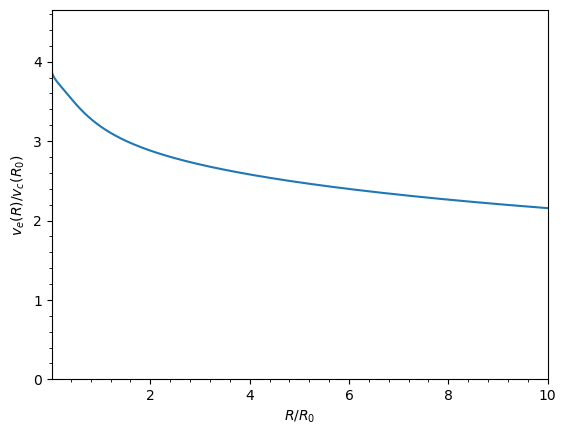

In [12]:
from galpy.potential import plotEscapecurve
plotEscapecurve(mp+hp+np, Rrange=[0.01,10.], grid=1001)

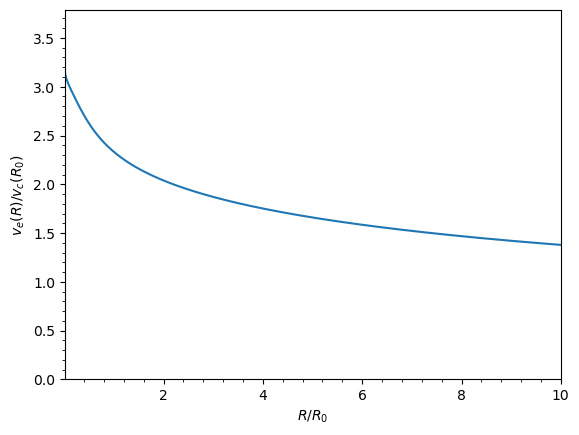

In [13]:
from galpy.potential import MWPotential2014
plotEscapecurve(MWPotential2014,Rrange=[0.01,10.],grid=1001)

In [19]:
from galpy.potential import vesc
print("      Escaple velocity at solar radius = ", vesc(MWPotential2014,1.))
# expect 2.3316389848832784
print("For local circular velocity of 220 km/s, ", vesc(MWPotential2014,1.)*220.) # units?
# expect 512.96057667432126

      Escaple velocity at solar radius =  2.3316389848832784
For local circular velocity of 220 km/s,  512.9605766743213
